In [1]:
%matplotlib widget
from sympy import Function, Symbol, dsolve, solve                #ez kell a szimbolikus megoldáshoz                                                             
import matplotlib.pyplot as plt                             #plot
import numpy as np    

<h3 style="background :Red; padding: 1%!important;"> 1. Házi feladat. (2 pont)</h3>

Határozd meg az $y'(x) = x\cdot y(x)$, $y(0)=y_0$ Cauchy feladat megoldását minden $y_0\in\{-1,-0.8,\dots,0.8,1\}$ értékre, majd ábrázold a kapott megoldásokat! 

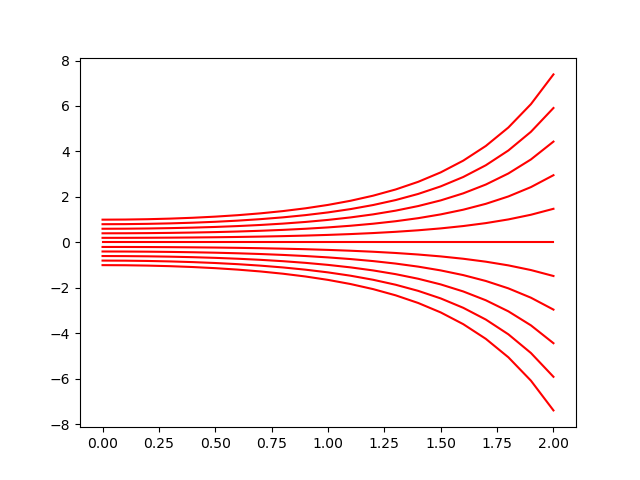

In [9]:
def create_plot1(): 
    x = Symbol('x')
    y = Function('y')
    fig,ax = plt.subplots()
    y0 = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]
    for c in y0:
        part_sol = dsolve(y(x).diff(x)-x*y(x), ics={y(0):c})
        x_vals = np.linspace(0,2,21)                            
        y_vals = [part_sol.rhs.subs({x:xx}) for xx in x_vals]
        ax.plot(x_vals,y_vals,'r')  

create_plot1()

<h3 style="background :Red; padding: 1%!important;"> 2. Házi feladat. (2 pont)</h3>

Egy $37^\circ\text{C}$-os krumplit elhelyezünk egy $12^\circ\text{C}$-os állandó hőmérsékletű pincébe. Tudva, hogy egy óra elteltével a krumpli $30^\circ\text{C}$-os, ábrázold a krumpli hőmérsékletét az idő függvényében az első 10 órában.

**A megoldásban csak a megadott differenciálegyenlet, a feladat adatai és Python egyenlet megoldói használhatóak, papíron számolt megoldások, vagy levezetett képletek nem.**

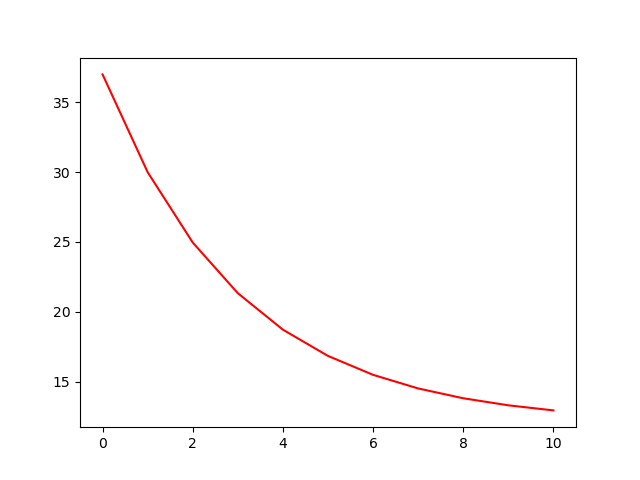

In [3]:
def potato():
    x = Symbol('x')
    r = Symbol('r')
    y = Function('y')
    szoba = 12
    gen_sol = dsolve(y(x).diff(x) + r * (y(x) - szoba), y(x), ics={y(0): 37})
    r1 = solve(gen_sol.rhs.subs({x:1})-30)[0]
    solved = gen_sol.subs({r:r1})
    X = list(range(11))
    Y = [solved.rhs.subs({x:xx}) for xx in X]
    fig,ax = plt.subplots()
    ax.plot(X, Y, 'r')  

potato()

<h3 style="background :Red; padding: 1%!important;"> 3. Házi feladat. (2 pont)</h3> 

Egy $12^\circ\text{C}$-os állandó hőmérsékletű pincében déli 12:00-kor találtak egy $27^\circ\text{C}$-os holttestet. A holttest megtalálás után egy órával szintén megmérjük annak hőmérsékletét, ekkor az $22^\circ\text{C}$. Tudva, hogy a halál beálltakor a testhőmérséklet $37^\circ\text{C}$, határozd meg a halál beálltának pillanatát (óra, perc, másodperc). Ábrázold a test hőmérsékletét az idő függvényében a halál beálltának pillanatától a második mérésig.  
A kapott görbén tüntesd fel a két mérésnek megfelelő pontokat. 

**A megoldásban csak a megadott differenciálegyenlet, a feladat adatai és Python egyenlet megoldói használhatóak, papíron számolt megoldások, vagy levezetett képletek nem.**

10:44:24


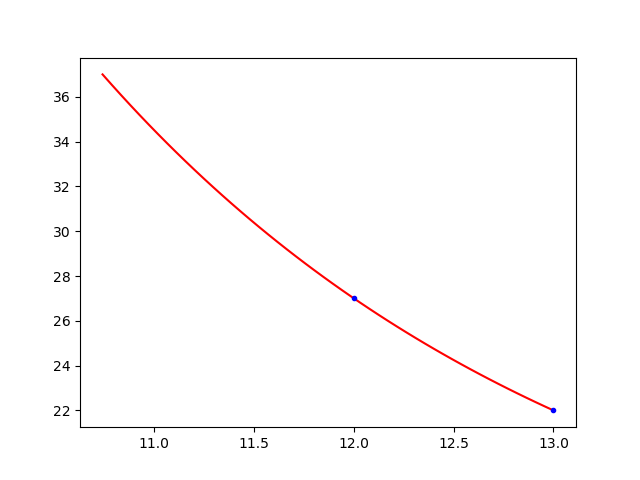

In [10]:
def dead_body():
    x = Symbol('x')
    r = Symbol('r')
    y = Function('y')
    szoba = 12
    gen_sol = dsolve(y(x).diff(x) + r * (y(x) - szoba), ics={y(12): 27})
    r1 = solve(gen_sol.rhs.subs({x:13})-22)[0]
    solved = gen_sol.subs({r:r1})
    
    time = solve(solved.rhs - 37)[0].evalf()
    total_seconds = int(time * 3600)
    hours = total_seconds // 3600
    minutes = (total_seconds - hours * 3600) // 60
    seconds = total_seconds - hours * 3600 - minutes * 60
    print(str(hours) + ":" + str(minutes) + ":" + str(seconds))

    X = np.linspace(float(time), 13)
    Y = [solved.rhs.subs({x:xx}) for xx in X]
    fig,ax = plt.subplots()
    ax.plot(X, Y, 'r')
    ax.plot(12, 27, 'b.')
    ax.plot(13, 22, 'b.')

dead_body()


<h3 style="background :Red; padding: 1%!important;"> 4. Házi feladat. (2 pont)</h3>

    
Szabadon engedünk $H=10m$ magasságból egy testet. 

$\quad$ a) Határozd meg és írasd ki az $y(t)$ függvényt, vagyis a test magasságát az idő függvényében!   

$\quad$ b) Határozd meg azt a $t_\text{max}$ időpillanatot, amikor a test földet ér!  

$\quad$ c) Ábrázold a test magasságát az idő függvényében a $[0,t_\text{max}]$ intervallumon!

A közegellenállástól eltekintünk és legyen $g=9{,}81 m/s^2$.

**A megoldásban csak a megadott differenciálegyenlet, a feladat adatai és Python egyenlet megoldói használhatóak, papíron számolt megoldások, vagy levezetett képletek nem.**

y(t) = Eq(y(t), 10 - 4.905*t**2)
1.42784312292706


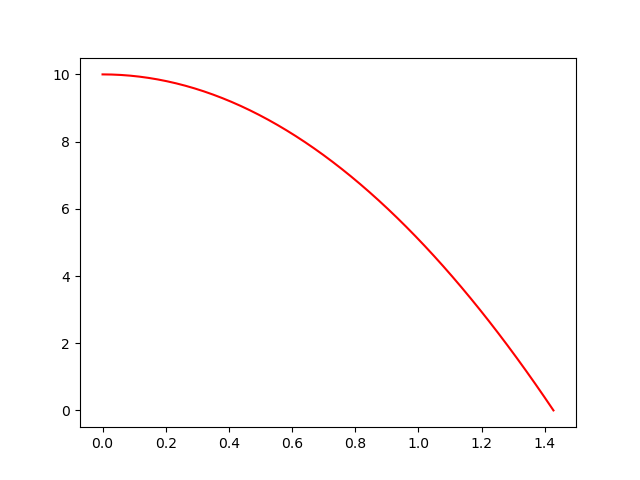

In [11]:
def free_fall():
    y = Function('y')
    t = Symbol('t')
    H = Symbol('H')
    g = Symbol('g')
    gen_sol = dsolve(y(t).diff(t,2)+g, y(t), ics={y(0): H, y(t).diff(t).subs(t,0): 0})
    gen_sol = gen_sol.subs({H:10, g:9.81})
    print("y(t) = " + str(gen_sol))

    t_max = solve(gen_sol.rhs)[1]
    print(t_max)
    
    X = np.linspace(0, float(t_max))
    Y = [gen_sol.rhs.subs({t:xx}) for xx in X]
    fig,ax = plt.subplots()
    ax.plot(X, Y, 'r')

free_fall()

<h3 style="background :Red; padding: 1%!important;"> 5. Házi feladat. (+2 pont)</h3>

    
A $(0,20)$ koordinátájú pontból $v_0=5\text{ m}/\text{s}$ kezdősebességgel $\alpha=30^\circ$-os szög alatt eldobunk egy testet.

$\quad$ a) Határozd meg és írasd ki az $x(t)$ és $y(t)$ függvényeket!   

$\quad$ b) Határozd meg azt a $t_\text{max}$ időpillanatot, amikor a test földet ér!  

$\quad$ c) Ábrázold a test $(x(t),y(t))$ pályáját $[0,t_\text{max}]$ intervallumon!

A közegellenállástól eltekintünk és legyen $g=9{,}81 m/s^2$.

**A megoldásban csak a megadott differenciálegyenlet, a feladat adatai és Python egyenlet megoldói használhatóak, papíron számolt megoldások, vagy levezetett képletek nem.**

Eq(x(t), 4.3301270189222*t)
Eq(y(t), -4.905*t**2 + 2.5*t + 20.0)
2.29013470696042


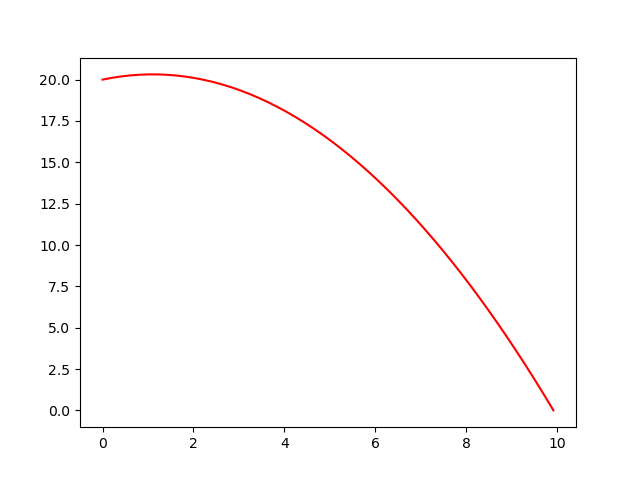

In [12]:
def dobas():
    y = Function('y')
    x = Function('x')
    t = Symbol('t')
    g = Symbol('g')
    v = Symbol('v')
    a = np.pi/6
    gen_sol_x = dsolve(x(t).diff(t,2), ics={x(0): 0, x(t).diff(t).subs(t,0): v * np.cos(a)})
    gen_sol_y = dsolve(y(t).diff(t,2) + g, ics={y(0): 20, y(t).diff(t).subs(t,0): v * np.sin(a)})
    gen_sol_y = gen_sol_y.subs({g:9.81, v:5})
    gen_sol_x = gen_sol_x.subs({v: 5})
    print(gen_sol_x)
    print(gen_sol_y)

    t_max = solve(gen_sol_y.rhs)[1]
    print(t_max)
    
    T = np.linspace(0, float(t_max))
    X = [gen_sol_x.rhs.subs({t:xx}) for xx in T]
    Y = [gen_sol_y.rhs.subs({t:xx}) for xx in T]
    fig,ax = plt.subplots()
    ax.plot(X, Y, 'r')
    

dobas()

<h3 style="background :Red; padding: 1%!important;"> 6. Házi feladat. (2 pont)</h3>

Egy vízszintes asztallapon egy $k=1N/m$ rugóállandójú rugó egyik végét rögzítjük, a másik végére ráerősítünk egy $m=1 kg$ tömegű testet. A testet kimozdítjuk $x_0=0{,}5$ méterrel, majd elengedjük.

$\quad$ a) Határozd meg és írasd ki az $x(t)$ függvényt!   

$\quad$ b) Határozd meg azt a $t_2$ időpillanatot, amikor a test másodszor kerül az $x=0$ pozícióba!  

$\quad$ c) Ábrázold az  $x(t)$ függvényt a $[0,t_2]$ intervallumon!

Az asztallap és a test közötti súrlódástól eltekintünk.

**A megoldásban csak a megadott differenciálegyenlet, a feladat adatai és Python egyenlet megoldói használhatóak, papíron számolt megoldások, vagy levezetett képletek nem.**


Eq(x(t), 0.5*cos(t))
4.71238898038469


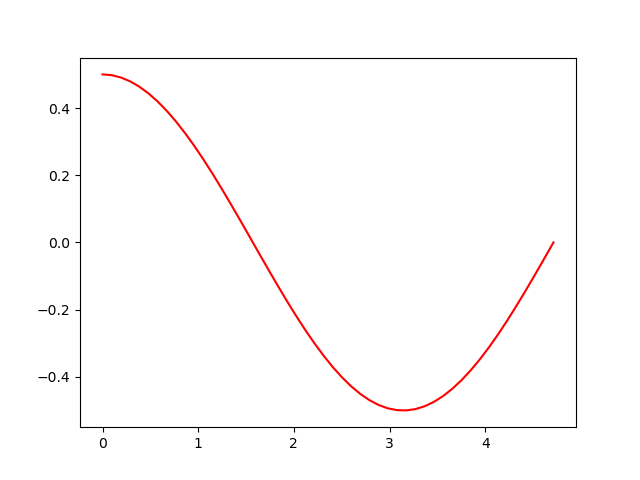

In [13]:
def rugo():
    x = Function('x')
    t = Symbol('t')
    gen_sol_x = dsolve(x(t).diff(t,2) + x(t), ics={x(0): 0.5, x(t).diff(t).subs(t,0): 0})
    print(gen_sol_x)

    t2 = solve(gen_sol_x.rhs)[1]
    print(t2)
    
    X = np.linspace(0, float(t2))
    Y = [gen_sol_x.rhs.subs({t:xx}) for xx in X]
    fig,ax = plt.subplots()
    ax.plot(X, Y, 'r')
    

rugo()